### (non finito, vedi secondo punto) 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


In [1]:
import numpy as np
import scipy.stats
import pylab as plt

In [2]:
def f(x, sigma):
    return 0.5* np.sqrt(2*np.pi*sigma**2) * x**3

We divided by 2 because we computed the absolute value of the distribution, in order to integrate only over the positive x

In [3]:
def inte (x, sigma, N):
    return (1/N)* np.sum(f(x, sigma)) 

In [17]:
mu, sigma = 0., 2. # mean and standard deviation
N = [100, 1000, 10000, 100000, 1000000]

xmin=0
x_i = np.abs(np.random.normal(mu, sigma, N))

100
1000
10000
100000
1000000


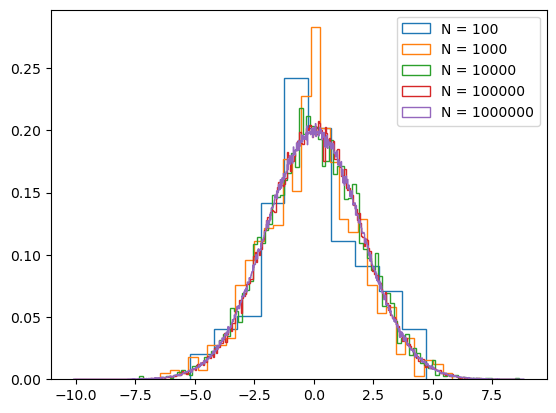

In [18]:
for i in range(len(N)):
    x_i = np.random.normal(mu, sigma, N[i])
    plt.hist(x_i, bins=int(N[i]**0.5) ,histtype='step', density=True,  label=f'N = {N[i]}')
    plt.legend()
    print(np.size(x_i))


100
1000
10000
100000
1000000


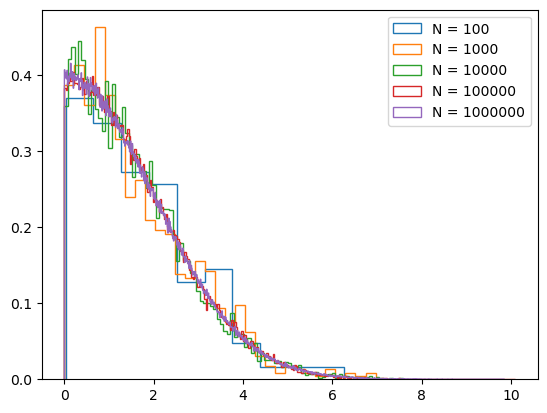

In [19]:
for i in range(len(N)):
    x_i_abs = np.abs(np.random.normal(mu, sigma, N[i])) 
    plt.hist(x_i_abs, bins=int(N[i]**0.5) ,histtype='step', density=True,  label=f'N = {N[i]}')
    plt.legend()
    print(np.size(x_i_abs))

In [21]:
print('Integral results')
for i in range(len(N)):
    x_i_abs = np.abs(np.random.normal(mu, sigma, N[i])) 
    print(f'for N = ', N[i], ': integral =', inte(x_i_abs, sigma, N[i]))

Integral results
for N =  100 : integral = 22.170685179261206
for N =  1000 : integral = 34.874597721097544
for N =  10000 : integral = 32.634924485250146
for N =  100000 : integral = 32.1829475997542
for N =  1000000 : integral = 31.952795092571506
